In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import tensorflow as tf
import seaborn as sns
sns.set()

In [2]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

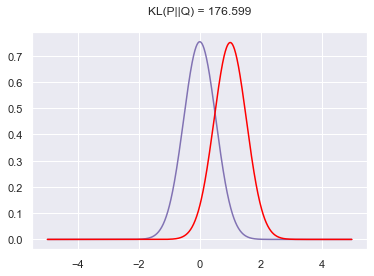

In [3]:
x = np.arange(-5, 5, .01)
p = norm.pdf(x, 0, 0.53)
q = norm.pdf(x, 1, 0.5321)
plt.title('KL(P||Q) = %1.3f\n' % kl_divergence(p, q))
plt.plot(x, p, c='m')
plt.plot(x, q, c='red')

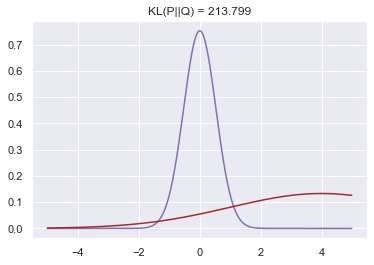

In [4]:
q = norm.pdf(x, 4, 3)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p, c='m')
plt.plot(x, q, c='brown')

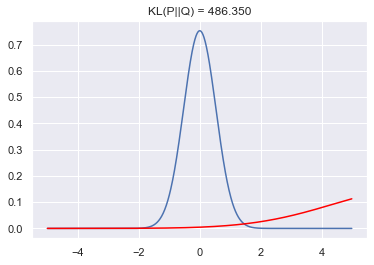

In [5]:
q = norm.pdf(x, 7, 2.66)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(q, p))
plt.plot(x, p)
plt.plot(x, q, c='red')

In [6]:
x = np.arange(-10, 10, 0.001)
p_pdf = norm.pdf(x, 0, 2).reshape(1, -1)
np.random.seed(0)
random_mean = np.random.randint(10, size=1)
random_sigma = np.random.randint(10, size=1)
random_pdf = norm.pdf(x, random_mean, random_sigma).reshape(1, -1)

C:\Users\Pradip\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


In [7]:
print(p_pdf.shape)
print(x.shape)
print(random_pdf.shape)

(1, 20000)
(20000,)
(1, 20000)


In [8]:
learning_rate = 0.001
epochs = 100

In [9]:
tf.compat.v1.disable_eager_execution()
p = tf.compat.v1.placeholder(tf.float64, shape=p_pdf.shape)
mu = tf.Variable(np.zeros(1))
sigma = tf.Variable(np.eye(1))
normal = tf.exp(-tf.square(x - mu) / (2 * sigma))
q = normal / tf.reduce_sum(normal)

In [10]:
kl_divergence = tf.reduce_sum(tf.where(p == 0, tf.zeros(p_pdf.shape, tf.float64), p * tf.math.log(p / q)))

In [11]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(kl_divergence)

In [12]:
init = tf.compat.v1.global_variables_initializer()

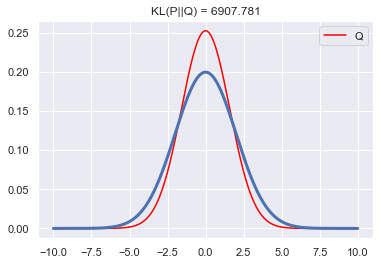

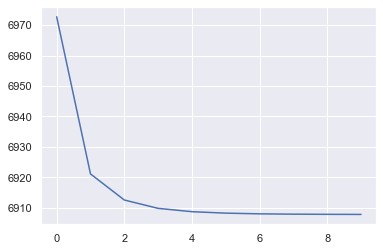

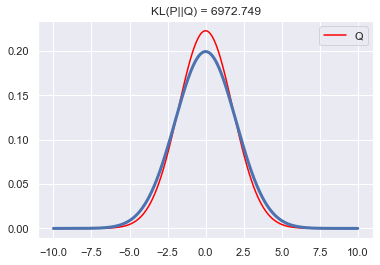

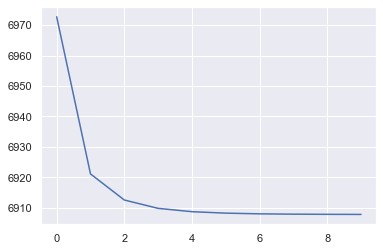

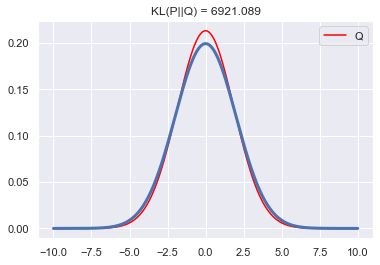

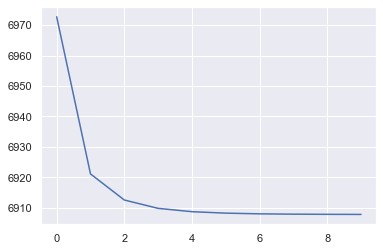

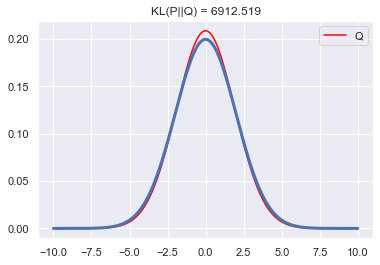

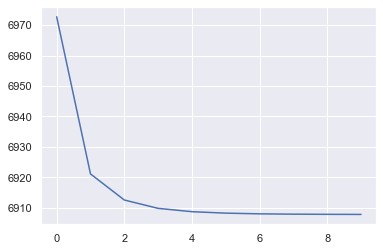

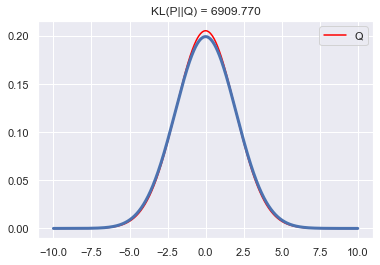

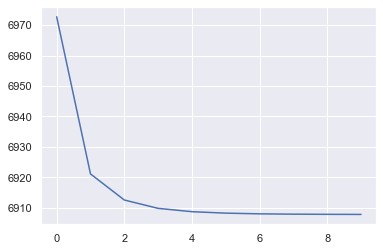

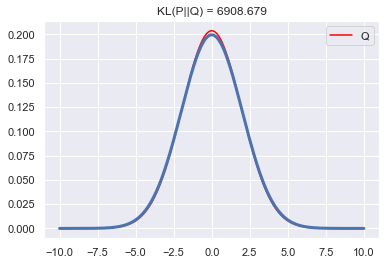

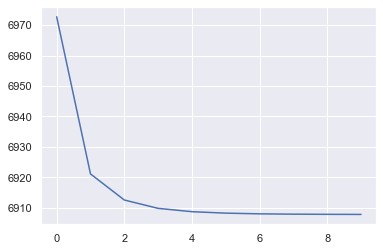

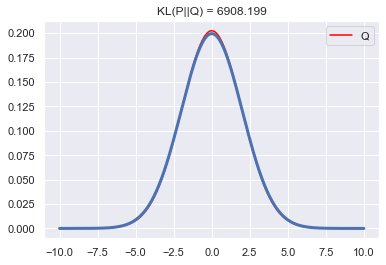

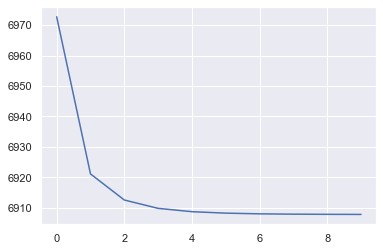

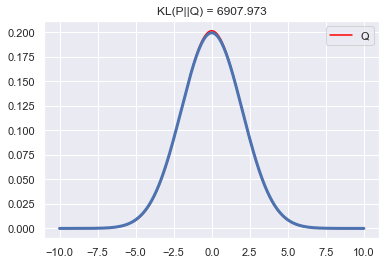

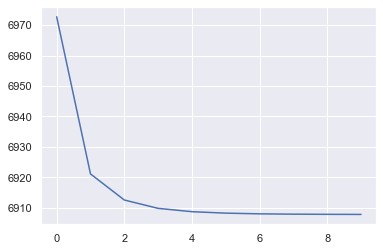

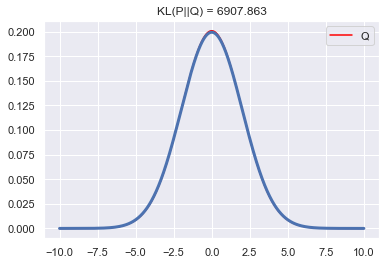

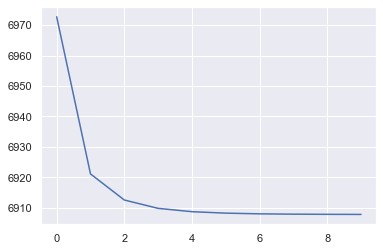

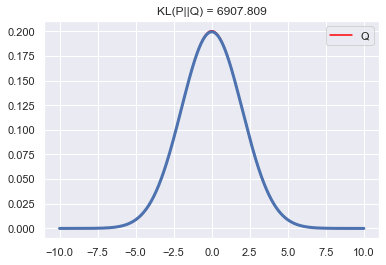

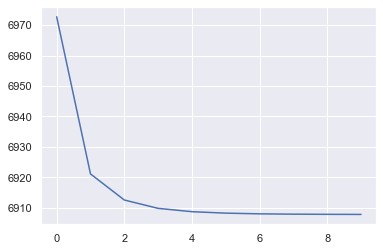

In [13]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    history = []
    means = []
    variances = []
    
    for i in range(epochs):
        sess.run(optimizer, { p: p_pdf })
        
        if i % 10 == 0:
            history.append(sess.run(kl_divergence, { p: p_pdf }))
            means.append(sess.run(mu)[0])
            variances.append(sess.run(sigma)[0][0])
    i=-1
    for mean, variance in zip(means, variances):
        q_pdf = norm.pdf(x, mean, np.sqrt(variance))
        plt.plot(x, q_pdf.reshape(-1, 1), c='red')
        plt.legend(['Q'])
        plt.title('KL(P||Q) = %1.3f' % history[i])
        i=i+1
        plt.plot(x, p_pdf.reshape(-1, 1), linewidth=3)
        plt.show()
        plt.plot(history)
        plt.show()
    
    sess.close()